## STUDENT PERFORMANCE INDICATOR

**Life Cycle of machine learning project**

1. Understanding the problem statement
2. Data collection
3. Data checks to perform
4. Explorartory data analysis
5. Data preprocessing
6. Model training
7. Choosing the best model

## 1\) Problem statement
This project understands how the students performance is affected by other by variables such as gender,ethinicity,parental level of education

In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [170]:
df=pd.read_csv('data/stud.csv')

In [171]:
df_original=df.copy()

In [172]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [174]:
## Identifying the categorical variables

for c in df.columns:
    if df[c].dtype=='object':
        print(len(df[c].unique()))
        print(df[c].unique())
   

2
['female' 'male']
5
['group B' 'group C' 'group A' 'group D' 'group E']
6
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
2
['standard' 'free/reduced']
2
['none' 'completed']


In [175]:
## encoding the categorical variables

from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,LabelEncoder

gender_encoder=OneHotEncoder(sparse_output=False,drop='first')
race_encoder=OneHotEncoder(sparse_output=False,drop='first')
order=[
   "master's degree",
"bachelor's degree",
"associate's degree",
"some college",
"high school",
"some high school"
]
parental_encoder=OrdinalEncoder(categories=[order])
lunch_encoder=LabelEncoder()
test_encoder=LabelEncoder()



In [176]:
encoded_gender=gender_encoder.fit_transform(df[['gender']])
gender_df=pd.DataFrame(encoded_gender,columns=['gender_male'])

In [177]:
encoded_race=race_encoder.fit_transform(df[['race/ethnicity']])

race_df=pd.DataFrame(encoded_race,columns=[ 'group B', 'group C', 'group D', 'group E'])

In [178]:
race_df

,group B,group C,group D,group E
0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
995,0.0,0.0,0.0,1.0
996,0.0,1.0,0.0,0.0
997,0.0,1.0,0.0,0.0
998,0.0,0.0,1.0,0.0


In [179]:
encoded_parents=parental_encoder.fit_transform(df[['parental level of education']])
parental_df=pd.DataFrame(encoded_parents,columns=['parental_level_of_education'])

In [180]:
parental_df


,parental_level_of_education
0,1.0
1,3.0
2,0.0
3,2.0
4,3.0
...,...
995,0.0
996,4.0
997,4.0
998,3.0


In [181]:
df['lunch']=lunch_encoder.fit_transform(df[['lunch']])

c:\Users\prodd\ml projects\venv1\lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [182]:
df['test preparation course']=test_encoder.fit_transform(df[['test preparation course']])

c:\Users\prodd\ml projects\venv1\lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [183]:
df=pd.concat([df,gender_df,race_df,parental_df],axis=1)

In [184]:
df.drop(columns=['gender','race/ethnicity','parental level of education'],axis=1,inplace=True)

In [185]:
df

,lunch,test preparation course,math score,reading score,writing score,gender_male,group B,group C,group D,group E,parental_level_of_education
0,1,1,72,72,74,0.0,1.0,0.0,0.0,0.0,1.0
1,1,0,69,90,88,0.0,0.0,1.0,0.0,0.0,3.0
2,1,1,90,95,93,0.0,1.0,0.0,0.0,0.0,0.0
3,0,1,47,57,44,1.0,0.0,0.0,0.0,0.0,2.0
4,1,1,76,78,75,1.0,0.0,1.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,88,99,95,0.0,0.0,0.0,0.0,1.0,0.0
996,0,1,62,55,55,1.0,0.0,1.0,0.0,0.0,4.0
997,0,0,59,71,65,0.0,0.0,1.0,0.0,0.0,4.0
998,1,0,68,78,77,0.0,0.0,0.0,1.0,0.0,3.0


In [186]:
df['Total_score']=df['math score']+df['reading score']+df['writing score']

In [187]:
df['Average_score']=df['Total_score']/3

In [188]:
df.drop(columns=['math score','reading score','writing score'],axis=1,inplace=True)

In [189]:
df

,lunch,test preparation course,gender_male,group B,group C,group D,group E,parental_level_of_education,Total_score,Average_score
0,1,1,0.0,1.0,0.0,0.0,0.0,1.0,218,72.666667
1,1,0,0.0,0.0,1.0,0.0,0.0,3.0,247,82.333333
2,1,1,0.0,1.0,0.0,0.0,0.0,0.0,278,92.666667
3,0,1,1.0,0.0,0.0,0.0,0.0,2.0,148,49.333333
4,1,1,1.0,0.0,1.0,0.0,0.0,3.0,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,1,0,0.0,0.0,0.0,0.0,1.0,0.0,282,94.000000
996,0,1,1.0,0.0,1.0,0.0,0.0,4.0,172,57.333333
997,0,0,0.0,0.0,1.0,0.0,0.0,4.0,195,65.000000
998,1,0,0.0,0.0,0.0,1.0,0.0,3.0,223,74.333333


In [190]:
for col in df.columns:
    if df[col].dtype=='float':
        df[col]=df[col].astype(int)

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   lunch                        1000 non-null   int64
 1   test preparation course      1000 non-null   int64
 2   gender_male                  1000 non-null   int64
 3   group B                      1000 non-null   int64
 4   group C                      1000 non-null   int64
 5   group D                      1000 non-null   int64
 6   group E                      1000 non-null   int64
 7   parental_level_of_education  1000 non-null   int64
 8   Total_score                  1000 non-null   int64
 9   Average_score                1000 non-null   int64
dtypes: int64(10)
memory usage: 78.2 KB


In [192]:
df

,lunch,test preparation course,gender_male,group B,group C,group D,group E,parental_level_of_education,Total_score,Average_score
0,1,1,0,1,0,0,0,1,218,72
1,1,0,0,0,1,0,0,3,247,82
2,1,1,0,1,0,0,0,0,278,92
3,0,1,1,0,0,0,0,2,148,49
4,1,1,1,0,1,0,0,3,229,76
...,...,...,...,...,...,...,...,...,...,...
995,1,0,0,0,0,0,1,0,282,94
996,0,1,1,0,1,0,0,4,172,57
997,0,0,0,0,1,0,0,4,195,65
998,1,0,0,0,0,1,0,3,223,74


In [213]:
from sklearn.
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,root_mean_squared_error,r2_score

X=df.drop(['Average_score','Total_score'],axis=1)
y=df['Average_score']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1000)



In [199]:
y_train

415    75
166    51
172    82
263    94
464    65
       ..
251    79
704    62
71     60
599    76
435    50
Name: Average_score, Length: 700, dtype: int64

In [214]:
regressor=KNeighborsRegressor()
regressor.fit(X_train,y_train)


KNeighborsRegressor()

In [215]:
X_test

,lunch,test preparation course,gender_male,group B,group C,group D,group E,parental_level_of_education
967,1,1,1,0,1,0,0,3
713,1,1,1,0,0,1,0,0
222,0,1,0,0,1,0,0,5
321,1,1,0,0,0,0,1,4
898,1,0,1,0,0,1,0,2
...,...,...,...,...,...,...,...,...
763,1,1,0,1,0,0,0,4
758,0,0,0,0,0,1,0,3
496,1,1,0,0,1,0,0,3
398,1,1,1,1,0,0,0,5


In [216]:
y_pred=regressor.predict(X_test)

r2_score(y_test,y_pred)

-0.04018866765202134

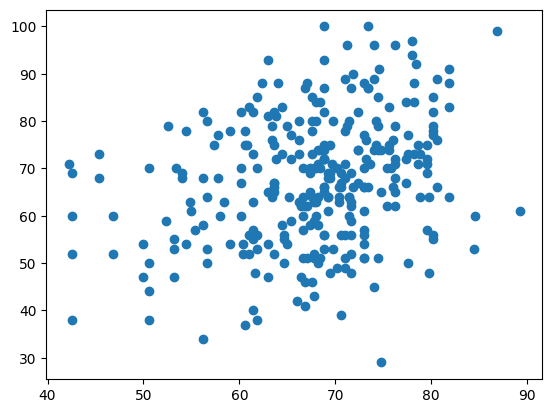

In [217]:
plt.scatter(y_pred,y_test)